In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [2]:
osteo = pd.read_csv('osteoporosis.csv')

In [3]:
osteo.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [4]:
osteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [5]:
#view the objects to see what objects are present in them and if any NaN are present in them 
for col in osteo.columns:
    print(osteo[col])
#not sure if we want to change the labels to numerical values to make the data easier to handle, if not thats okay too, we can use algorithms to count!

0       1734616
1       1419098
2       1797916
3       1805337
4       1351334
         ...   
1953    1991635
1954    1528601
1955    1990957
1956    1779848
1957    1282963
Name: Id, Length: 1958, dtype: int64
0       69
1       32
2       89
3       78
4       38
        ..
1953    19
1954    23
1955    34
1956    25
1957    26
Name: Age, Length: 1958, dtype: int64
0       Female
1       Female
2       Female
3       Female
4         Male
         ...  
1953    Female
1954    Female
1955    Female
1956      Male
1957    Female
Name: Gender, Length: 1958, dtype: object
0               Normal
1               Normal
2       Postmenopausal
3               Normal
4       Postmenopausal
             ...      
1953            Normal
1954    Postmenopausal
1955    Postmenopausal
1956    Postmenopausal
1957    Postmenopausal
Name: Hormonal Changes, Length: 1958, dtype: object
0       Yes
1       Yes
2        No
3        No
4       Yes
       ... 
1953    Yes
1954    Yes
1955     No
1956    

In [6]:
osteo.drop('Id', axis=1, inplace=True) #we dont need the patient id's when figuring out if someone has osteoporosis 
osteo.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [7]:
def change_to_binary(df, name_of_column, val_one, val_two):
    df.loc[df[name_of_column] == val_one, name_of_column] = 0
    df.loc[df[name_of_column] == val_two, name_of_column] = 1
    df[name_of_column] = pd.to_numeric(df[name_of_column], errors = 'coerce')
    df = df.dropna(subset=[name_of_column])
    df[name_of_column] = df[name_of_column].astype(int)


def change_to_int(df, name_of_column, val_one, val_two, val_three):
    df.loc[df[name_of_column] == val_one, name_of_column] = 0
    df.loc[df[name_of_column] == val_two, name_of_column] = 1
    df.loc[df[name_of_column] == val_three, name_of_column] = 2
    df[name_of_column] = pd.to_numeric(df[name_of_column], errors = 'coerce')
    df = df.dropna(subset=[name_of_column])
    df[name_of_column] = df[name_of_column].astype(int)

osteo.fillna('No', inplace=True)
osteo.loc[osteo['Gender'] == 'Male', 'Hormonal Changes'] = 'Normal'
    
change_to_binary(osteo,'Gender','Male','Female')
change_to_binary(osteo,'Hormonal Changes','Postmenopausal','Normal')
change_to_binary(osteo,'Family History','Yes','No')
change_to_int(osteo, 'Race/Ethnicity', 'Caucasian', 'African American', 'Asian')
change_to_binary(osteo,'Body Weight','Underweight','Normal')
change_to_binary(osteo, 'Calcium Intake', 'Low', 'Adequate')
change_to_binary(osteo, 'Vitamin D Intake', 'Insufficient', 'Sufficient')
change_to_binary(osteo, 'Physical Activity', 'Sedentary', 'Active')
change_to_binary(osteo,'Smoking','Yes','No')
change_to_binary(osteo, 'Alcohol Consumption', 'No', 'Moderate')
change_to_int(osteo, 'Medical Conditions', 'No', 'Hyperthyroidism', 'Rheumatoid Arthritis')
change_to_binary(osteo, 'Medications', 'No', 'Corticosteroids')
change_to_binary(osteo,'Prior Fractures','Yes','No')


osteo.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,1,1,0,2,0,0,1,0,0,1,2,1,0,1
1,32,1,1,0,2,0,0,1,0,1,0,0,0,0,1
2,89,1,0,1,0,1,1,1,1,1,1,1,1,1,1
3,78,1,1,1,0,0,1,0,0,0,0,2,1,1,1
4,38,0,1,0,1,1,0,1,1,0,0,2,0,0,1


In [8]:
#train the data!
features_x = osteo.drop('Osteoporosis', axis=1)
target_y = osteo['Osteoporosis']

x_train, x_test, y_train, y_test = train_test_split(features_x, target_y, test_size = 0.4, random_state=1)

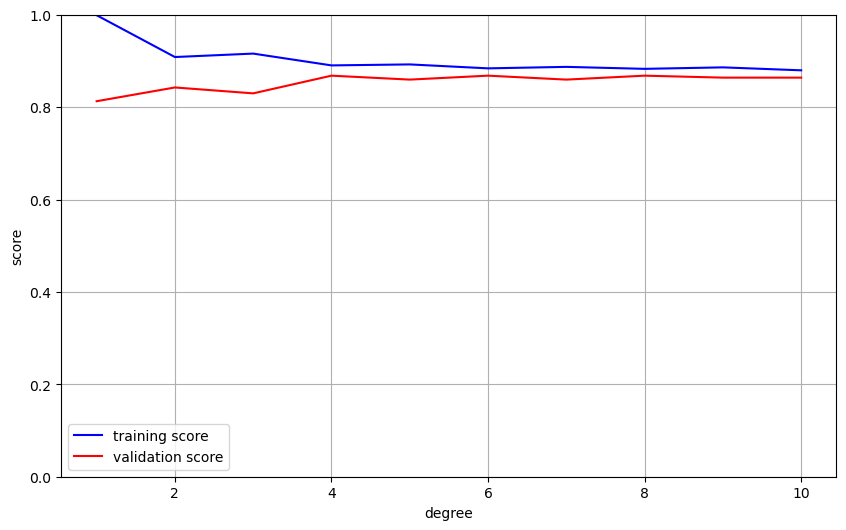

In [9]:
#validation curves
##validation curve code

degree = np.arange(1,11)
train_score, val_score = validation_curve(KNeighborsClassifier(), x_train, y_train, param_name="n_neighbors", param_range = degree, cv = 5)

plt.figure(figsize=(10,6))
plt.plot(degree, np.median(train_score,1), color='blue', label='training score')
plt.plot(degree, np.median(val_score,1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')
plt.grid(True)

In [10]:
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(x_train, y_train)
# take a look at predicted outcome
prediction = classifier.predict(x_test)
# compare to actual data
correct = np.where(prediction == y_test, 1, 0).sum()
accuracy = accuracy_score(y_test, prediction)
print("Correct predictions:", correct)
print("Accuracy:", accuracy)
print(classification_report(y_test, prediction))

Correct predictions: 681
Accuracy: 0.8686224489795918
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       392
           1       0.97      0.76      0.85       392

    accuracy                           0.87       784
   macro avg       0.89      0.87      0.87       784
weighted avg       0.89      0.87      0.87       784



In [11]:
print("Accuracy for 8-neighbor:", accuracy)
from sklearn.naive_bayes import GaussianNB  # 1. Using the Gausian naive_bayes model
model = GaussianNB()                        # 2. instantiate the model
model.fit(x_train, y_train)                   # 4. fit the model to the data
y_model = model.predict(x_test)              # 5. predict on new data
# check our accuracy!
GNB_acc = accuracy_score(y_test, y_model)
print("Accuracy score of Gausian Naive Bayes: ", GNB_acc)

Accuracy for 8-neighbor: 0.8686224489795918
Accuracy score of Gausian Naive Bayes:  0.8290816326530612
